# Clustering Auto Machine Learning with Pycaret

## 1.0 Libraries & Functions

In [76]:
# Data extraction and Manipulation
import pandas as pd
import numpy as np

# Preprocessing and Modeling
from pycaret.clustering import (
    setup, models, create_model, assign_model, plot_model, tune_model)
from pycaret.utils import check_metric

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

## 2.0 Data Extraction

In [5]:
df = pd.read_csv("datasets/bankmarketing.csv")

In [6]:
# spliting data for train/test and validation
df_train = df.sample(frac=0.95, random_state=786)
df_valid = df.drop(df_train.index, axis=0)

# reseting index
df_train.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)

df_train.shape, df_valid.shape

((39129, 21), (2059, 21))

## 3.0 Data Analysis

In [7]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,blue-collar,married,professional.course,unknown,no,no,cellular,jul,fri,109,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
1,42,blue-collar,married,basic.6y,unknown,no,no,telephone,may,fri,108,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
2,21,unemployed,single,high.school,no,yes,no,telephone,aug,tue,172,2,999,0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,no
3,39,housemaid,married,basic.4y,no,no,no,cellular,aug,thu,179,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4,47,blue-collar,married,basic.4y,unknown,no,yes,cellular,nov,fri,105,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no


In [27]:
# Describing data
print(f"Rows, Columns: {df_train.shape}")
pd.concat(
    [
        df_train.dtypes,
        df_train.isna().mean(),
        df_train.nunique(),
        df_train.mean(),
        df_train.median(),
        df_train.std(),
        df_train.min(),
        df_train.max(),
        df_train.sample(3).T
    ], axis=1
).reset_index().rename(columns={
    'index':'feature',
    0:'dtypes', 
    1:'%_null',
    2:'unique_value',
    3:'mean',
    4:'median',
    5:'std',
    6:'min',
    7:'max',
    })

Rows, Columns: (39129, 21)


,feature,dtypes,%_null,unique_value,mean,median,std,min,max,36406,6141,13954
0,age,int64,0.0,78,40.014388,38.000,10.424634,17,98,33,27,34
1,job,object,0.0,12,NaN,NaN,NaN,admin.,unknown,technician,unemployed,self-employed
2,marital,object,0.0,4,NaN,NaN,NaN,divorced,unknown,single,single,single
3,education,object,0.0,8,NaN,NaN,NaN,basic.4y,unknown,university.degree,university.degree,university.degree
4,default,object,0.0,3,NaN,NaN,NaN,no,yes,no,no,no
5,housing,object,0.0,3,NaN,NaN,NaN,no,yes,yes,no,yes
6,loan,object,0.0,3,NaN,NaN,NaN,no,yes,no,no,no
7,contact,object,0.0,2,NaN,NaN,NaN,cellular,telephone,cellular,telephone,cellular
8,month,object,0.0,10,NaN,NaN,NaN,apr,sep,apr,jun,jul
9,day_of_week,object,0.0,5,NaN,NaN,NaN,fri,wed,thu,wed,wed


## 4.0 Pre Processing

## 5.0 Modeling

### 5.1 Setup

In [42]:
df_train['education'].value_counts()

university.degree      11561
high.school             9043
basic.9y                5750
professional.course     4970
basic.4y                3968
basic.6y                2185
unknown                 1634
illiterate                18
Name: education, dtype: int64

In [43]:
# datatype
categorical_features=[
    'job', 'marital', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'campaign',
    'poutcome'
]
numeric_features=[
    'age', 'duration', 'pdays', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]
ordinal_features={
    "education":[ 
        'unknown',
        'illiterate',
        'basic.4y',
        'basic.6y',
        'basic.9y',
        'high.school',
        'professional.course',
        'university.degree'
    ]
}
ignore_features=['y']

In [79]:
exp_01 = setup(
    data=df_train,
    session_id=123,
    n_jobs=2,
    #ignore_features=ignore_features,
    categorical_features=categorical_features,
    numeric_features=numeric_features,
    ordinal_features=ordinal_features,
    high_cardinality_features=['duration'],
    high_cardinality_method='frequency',
    combine_rare_levels=True,
    rare_level_threshold=0.3,
    remove_perfect_collinearity=True,
    ignore_low_variance=True,
    normalize=True,
    silent=True,
    verbose=False
)

### 5.1 Training (train/test)

In [70]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [80]:
kmeans = create_model(model='kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.177,7685.6504,1.9029,0,0,0


In [81]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=2, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)

### 5.2 Performance

In [73]:
kmeans_results = assign_model(model=kmeans)
kmeans_results.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Cluster
0,31,blue-collar,married,professional.course,unknown,no,no,cellular,jul,fri,109,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,Cluster 2
1,42,blue-collar,married,basic.6y,unknown,no,no,telephone,may,fri,108,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no,Cluster 1
2,21,unemployed,single,high.school,no,yes,no,telephone,aug,tue,172,2,999,0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,no,Cluster 0
3,39,housemaid,married,basic.4y,no,no,no,cellular,aug,thu,179,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,Cluster 1
4,47,blue-collar,married,basic.4y,unknown,no,yes,cellular,nov,fri,105,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no,Cluster 1


In [74]:
plot_model(model=kmeans, plot='cluster')

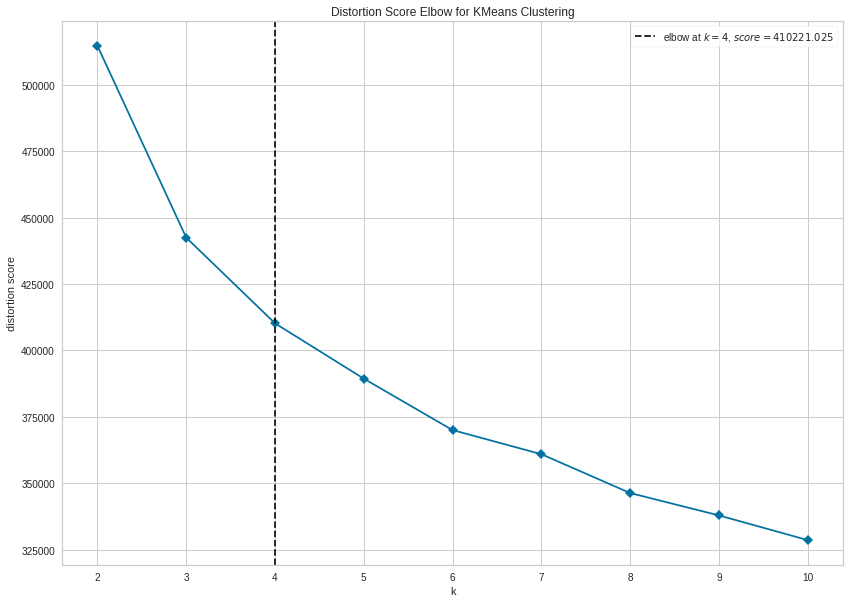

In [75]:
plt.figure(figsize=(14,10))
plot_model(model=kmeans, plot='elbow')

### 5.3 Using cluster on Classification

In [82]:
tunned = tune_model(model=kmeans, supervised_type='classification', supervised_target='y')

ValueError: Function <function tune_model_unsupervised.<locals>.highlight_min at 0x7f140bede280> resulted in the apply method collapsing to a Series.
Usually, this is the result of the function returning a single value, instead of list-like.

### 5.4 Final model

In [93]:
# datatype
categorical_features=[
    'job', 'marital', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'campaign',
    'poutcome'
]
numeric_features=[
    'age', 'duration', 'pdays', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]
ordinal_features={
    "education":[ 
        'unknown',
        'illiterate',
        'basic.4y',
        'basic.6y',
        'basic.9y',
        'high.school',
        'professional.course',
        'university.degree'
    ]
}
ignore_features=['y']

# setupping the preprocessing with train/test dataset
exp_02 = setup(
    data=df_train,
    session_id=123,
    n_jobs=2,
    ignore_features=ignore_features,
    categorical_features=categorical_features,
    numeric_features=numeric_features,
    ordinal_features=ordinal_features,
    high_cardinality_features=['duration'],
    high_cardinality_method='frequency',
    combine_rare_levels=True,
    rare_level_threshold=0.3,
    remove_perfect_collinearity=True,
    ignore_low_variance=True,
    normalize=True,
    silent=True,
    verbose=False
)

# creating model with 30 clusters
kmeans = create_model(model='kmeans', num_clusters=30)
# inputing cluster on dataset
df_results = assign_model(model=kmeans)

# shape original and clustered dataset
df_train.shape, df_results.shape

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1024,2117.0359,2.2128,0,0,0


((39129, 21), (39129, 22))

In [90]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,blue-collar,married,professional.course,unknown,no,no,cellular,jul,fri,109,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
1,42,blue-collar,married,basic.6y,unknown,no,no,telephone,may,fri,108,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
2,21,unemployed,single,high.school,no,yes,no,telephone,aug,tue,172,2,999,0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,no
3,39,housemaid,married,basic.4y,no,no,no,cellular,aug,thu,179,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
4,47,blue-collar,married,basic.4y,unknown,no,yes,cellular,nov,fri,105,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
